import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/hepatitis_csv.csv')

EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

null values

In [6]:
dataset.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

correlation plot

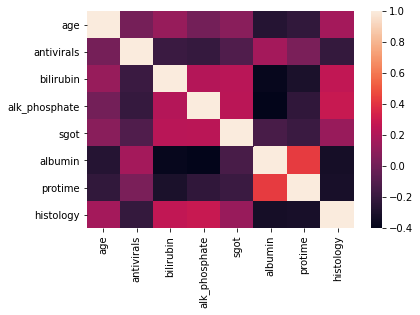

In [8]:
# import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
# infert = com.importr("ISLR")

# load the Auto dataset
# auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

correlation

In [9]:
corr

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


comparing each variables

In [11]:
dataset.loc[(dataset['histology']==True),['sex']].value_counts()

sex   
female    66
male       4
dtype: int64

Comparison of antivirals,spleen_palpable,spiders,varices

In [12]:
dataset.loc[(dataset['antivirals']==True),['spleen_palpable','spiders','varices']].value_counts()

spleen_palpable  spiders  varices
False            False    False      19
                 True     False       4
True             False    False       1
dtype: int64

Comparison of ascites and liver big

In [13]:
dataset.loc[(dataset['ascites']==True),['liver_big']].value_counts()

liver_big
True         16
False         1
dtype: int64

Comparison of steroids and liver big

In [14]:
dataset.loc[(dataset['steroid']==True),['liver_big']].value_counts()

liver_big
True         67
False         7
dtype: int64

Comparison of class and sex

In [15]:
dataset.loc[(dataset['class']=='die'),['sex']].value_counts()


sex   
female    32
dtype: int64

Comparison of malaise and liver big

In [16]:
dataset.loc[(dataset['malaise']==True),['liver_big']]

,liver_big
15,True
21,False
25,True
26,True
29,True
...,...
143,True
144,True
147,NaN
150,True


Line graph for age of male and female



sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

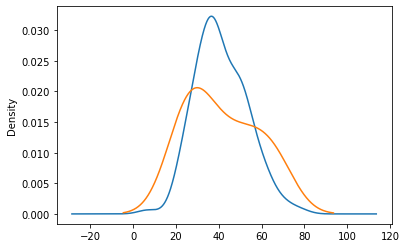

In [17]:
dataset.groupby('sex').age.plot(kind='kde')

interpretation:
1. It is evident that female population is high and the most affected age group is 30 - 40.
2. Antiviral is important, it will prevent spleen,spider and vertices. 
3. he patient with malaise will have fatigue but the vice versa need not be true.
4. Mostly affected age group is 30-40.